In [5]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai4eng-20242

chmod: cannot access './kaggle.json': No such file or directory
 70% 14.0M/20.1M [00:00<00:00, 69.0MB/s]
100% 20.1M/20.1M [00:00<00:00, 85.5MB/s]


In [10]:
!unzip udea*.zip > /dev/null

In [11]:
import pandas as pd
import numpy as np

z = pd.read_csv("train.csv")
print ("(rows, columns))", z.shape)

(rows, columns)) (692500, 12)


In [12]:
z.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


In [14]:
z['ESTU_PRGM_ACADEMICO'].value_counts()

,count
ESTU_PRGM_ACADEMICO,
DERECHO,53244
ADMINISTRACION DE EMPRESAS,51902
CONTADURIA PUBLICA,39664
PSICOLOGIA,31932
INGENIERIA INDUSTRIAL,28481
...,...
LICENCIATURA EN ESPAÑOL Y FILOLOGÍA,1
ADMINISTRACION EN NEGOCIOS INTERNACIONALES,1
ADMINISTRACION DE COMERCIO EXTERIOR,1


In [15]:
z['ESTU_VALORMATRICULAUNIVERSIDAD'].value_counts()

,count
ESTU_VALORMATRICULAUNIVERSIDAD,
Entre 1 millón y menos de 2.5 millones,204048
Entre 2.5 millones y menos de 4 millones,127430
Menos de 500 mil,80263
Entre 500 mil y menos de 1 millón,78704
Entre 4 millones y menos de 5.5 millones,69736
Más de 7 millones,68014
Entre 5.5 millones y menos de 7 millones,38490
No pagó matrícula,19528


In [18]:
z['RENDIMIENTO_GLOBAL'].value_counts()

,count
RENDIMIENTO_GLOBAL,
alto,175619
bajo,172987
medio-bajo,172275
medio-alto,171619


In [19]:
z['ESTU_HORASSEMANATRABAJA'].value_counts()

,count
ESTU_HORASSEMANATRABAJA,
Más de 30 horas,249352
0,116550
Entre 11 y 20 horas,115857
Entre 21 y 30 horas,92693
Menos de 10 horas,87191


In [20]:
z['ESTU_HORASSEMANATRABAJA'].value_counts()

,count
ESTU_HORASSEMANATRABAJA,
Más de 30 horas,249352
0,116550
Entre 11 y 20 horas,115857
Entre 21 y 30 horas,92693
Menos de 10 horas,87191


<Axes: xlabel='ESTU_HORASSEMANATRABAJA'>

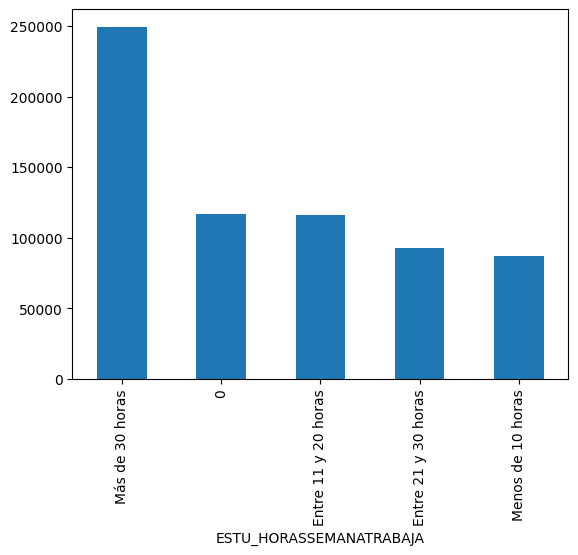

In [22]:
z['ESTU_HORASSEMANATRABAJA'].value_counts().plot(kind='bar')

In [ ]:
z = z[['FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'RENDIMIENTO_GLOBAL']]
z.head()


,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,RENDIMIENTO_GLOBAL
0,Estrato 3,Si,medio-alto
1,Estrato 3,No,bajo
2,Estrato 3,Si,bajo
3,Estrato 4,Si,alto
4,Estrato 3,Si,medio-bajo


<Axes: xlabel='FAMI_TIENEINTERNET'>

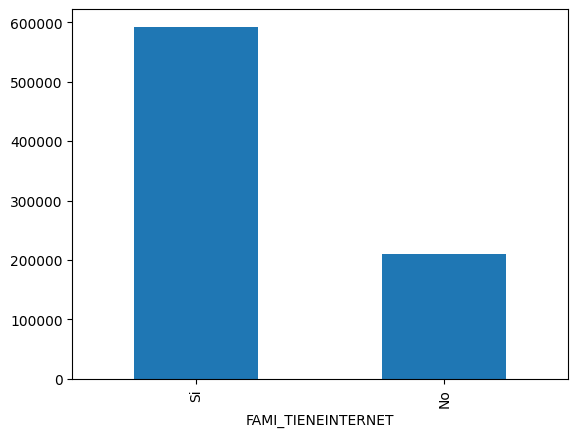

In [ ]:
z.FAMI_ESTRATOVIVIENDA.value_counts().plot(kind='bar')
z.FAMI_TIENEINTERNET.value_counts().plot(kind='bar')

In [ ]:
sum(z.FAMI_ESTRATOVIVIENDA.isna()), sum(z.FAMI_TIENEINTERNET.isna())

(32137, 26629)

In [ ]:
z.FAMI_ESTRATOVIVIENDA.values[z.FAMI_ESTRATOVIVIENDA.isna()] = 'no info'
sum(z.FAMI_ESTRATOVIVIENDA.isna()), sum(z.FAMI_TIENEINTERNET.isna())
z.head()

,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,RENDIMIENTO_GLOBAL
0,Estrato 3,Si,medio-alto
1,Estrato 3,No,bajo
2,Estrato 3,Si,bajo
3,Estrato 4,Si,alto
4,Estrato 3,Si,medio-bajo


In [ ]:
z.FAMI_TIENEINTERNET.values[z.FAMI_TIENEINTERNET.isna()] = 'no info'
sum(z.FAMI_ESTRATOVIVIENDA.isna()), sum(z.FAMI_TIENEINTERNET.isna())


(0, 0)

In [ ]:
z.head()

,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,RENDIMIENTO_GLOBAL
0,Estrato 3,Si,medio-alto
1,Estrato 3,No,bajo
2,Estrato 3,Si,bajo
3,Estrato 4,Si,alto
4,Estrato 3,Si,medio-bajo


In [ ]:
internet_map={
    'no info': 0,
    'No': 0,
    'Si': 1
}
z.FAMI_TIENEINTERNET = np.r_[[internet_map[i] for i in z.FAMI_TIENEINTERNET]]
z.FAMI_TIENEINTERNET.value_counts()

,count
FAMI_TIENEINTERNET,
1,592514
0,99986
